# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [30]:
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
# класс узла
class Node:
    value : int 
    
    def __init__(self, value) -> None:
        self.value = value
        self.edges=[]
        self.parents=dict()

# класс ребра
class Edge:
    nextNode : Node
    weight : int

    def __init__(self, nextNode, weight) -> None:
        self.nextNode = nextNode
        self.weight = weight

# добавляет или возвращает узел
def addOrGetNode(graph,value) -> Node:
    if (value==-1):
        return None
    if (value in graph.keys()):
        return graph[value]
    node=Node(value)
    graph[value]=node
    return node

# создает граф
def createGraph(graphData):
    graph=dict()
    for row in graphData:
        node = addOrGetNode(graph,row[0])
        nextNode= addOrGetNode(graph, row[1])
        if (nextNode==None):
            continue
        edge=Edge(nextNode,row[2])
        node.edges.append(edge)
        nextNode.parents[node]=edge
    return graph

# для матрицы смежности
def adjGraph(graphData):
    graph = dict()
    for ind,row in enumerate(graphData):
        node = addOrGetNode(graph, ind)
        for k,value in enumerate(row):
            if value==0:
                continue
            nextNode=addOrGetNode(graph, k)
            if (nextNode==None):
                continue
            edge=Edge(nextNode,value)
            node.edges.append(edge)
            nextNode.parents[node]=edge
    return graph

# для матрицы инцидентности
def incGraph(inc):
    graph = {}
    for col in range(len(inc[0])):  # по столбцам матрицы
        start_node = None
        end_node = None
        for row in range(len(inc)):  # по строкам матрицы
            if inc[row][col] == 1:
                start_node = addOrGetNode(graph, row)
            elif inc[row][col] == -1:
                end_node = addOrGetNode(graph, row)
        
        if start_node and end_node:
            edge = Edge(end_node, 1)
            start_node.edges.append(edge)
            end_node.parents[start_node.value] = edge

    return graph

def visualize_graph(graph):
    G = nx.DiGraph()
    for node in graph:
        for edge in graph[node].edges:
            G.add_edge(node, edge.nextNode.value, weight=edge.weight)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()



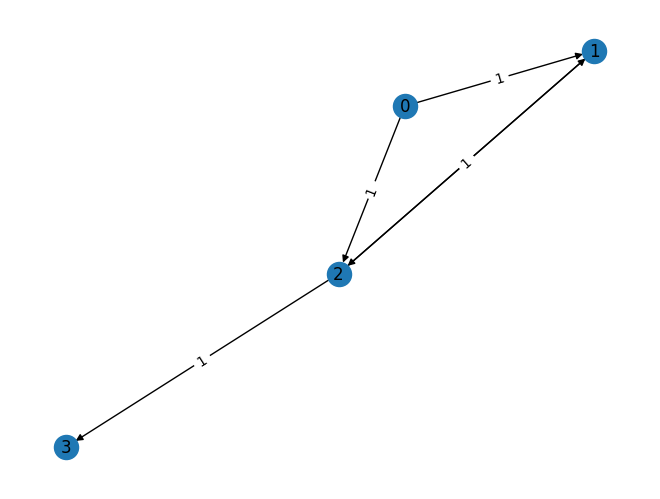

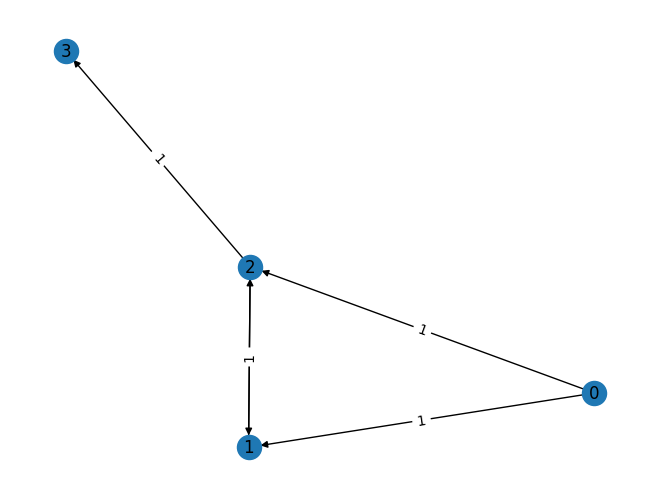

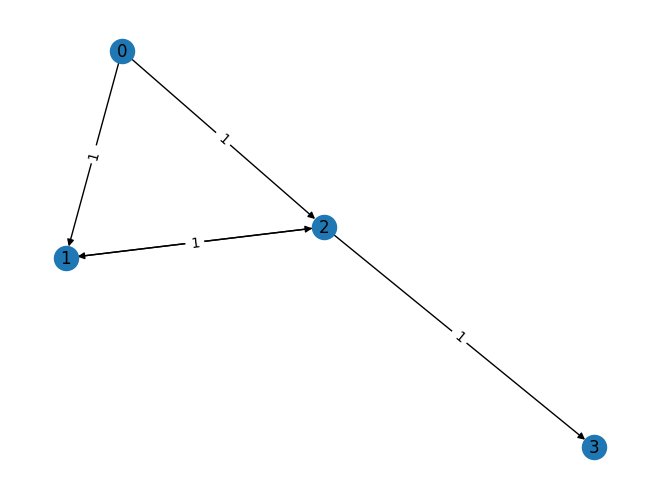

In [32]:
graphData=[
    [0,1,1],
    [0,2,1],
    [1,2,1],
    [2,1,1],
    [2,3,1]
]
graph=createGraph(graphData)
visualize_graph(graph)

adj = [
    [0,1,1,0],
    [0,0,1,0],
    [0,1,0,1],
    [0,0,0,0],
]
graph=adjGraph(adj)
visualize_graph(graph)

inc =[
    [ 1,  1, 0,  0, 0],
    [-1,  0, 1, -1, 0],
    [ 0, -1,-1,  1, 1],
    [ 0,  0, 0,  0,-1],
]
graph=incGraph(inc)
visualize_graph(graph)

### Вывод